<a href="https://colab.research.google.com/github/tommyryan3/testgithub/blob/main/AT_CompSci_MTG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Import Template

Follow these steps to get a kaggle dataset imported to this notebook, as detailed by this [article](https://towardsdatascience.com/setting-up-kaggle-in-google-colab-ebb281b61463).

## 1. Setting Up Kaggle

First, we need to install the Kaggle package.

In [1]:
## Install kaggle
!pip install kaggle

In [3]:
## Make a folder for your credentials
!mkdir /root/.kaggle

In [ ]:
## `touch` will create the kaggle.json file if it doesn't exist.
## If it already exists, touch will do harm. 
!touch /root/.kaggle/kaggle.json

Next, we need to configure our Kaggle tool to know who we are (our username) and prove that fact (with our key).

We'll do this by writing a `kaggle.json` file with that information and store that in our `/root/.kaggle directory.

**NOTE: The app token "key" listed below is fake, and your notebook will throw an error until you replace it.** 

In [4]:
import json

## Look up YOUR Kaggle token and username and add them here:
token = {"username":"ryanzorzi","key":"c22902d805e6e833c669e7d2baf30592"}

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [5]:
## OPTIONAL: Print the contents of the file to confirm that your username and key are now correctly stored.
!cat /root/.kaggle/kaggle.json

{"username": "ryanzorzi", "key": "c22902d805e6e833c669e7d2baf30592"}

We need to make sure this key is kept private, so run this line of code to protect the file. 

In [6]:
## This line changes the permissions of this file. 
!chmod 600 /root/.kaggle/kaggle.json

## 2. Downloading a Dataset 

You'll need to use `!` plus whatever command comes in through the API command from kaggle.com. For example, mine looks like this:

`!kaggle datasets download -d unanimad/golden-globe-awards`

**NOTE: This part won't work unless you paste your API command in from your *specific* dataset**. Adding the **!** is super important since the API command is written in a language other than Python.

In [7]:
## Use an ! plus your API command to download the data set.
!kaggle datasets download -d mylesoneill/magic-the-gathering-cards


100% 364M/366M [00:14<00:00, 32.1MB/s]
100% 366M/366M [00:14<00:00, 26.5MB/s]


Once that's done, you should check and confirm that the data is here, in the current directory. 

In [8]:
## Use the ls command below to confirm that your dataset is here in .zip format.
!ls

magic-the-gathering-cards.zip  sample_data


#### Unzip the Data

In [9]:
## Use this command to unzip any zip files present (including your data)
!unzip \*.zip

Archive:  magic-the-gathering-cards.zip
  inflating: AllCards.json           
  inflating: AllDeckFiles/AbzanSiege_KTK.json  
  inflating: AllDeckFiles/AdaptiveEnchantment_C18.json  
  inflating: AllDeckFiles/Aerodoom_BTD.json  
  inflating: AllDeckFiles/AirForces_WTH.json  
  inflating: AllDeckFiles/AirRazers_JUD.json  
  inflating: AllDeckFiles/AjaniGoldmane_DDH.json  
  inflating: AllDeckFiles/AjaniInspiringLeader_M20.json  
  inflating: AllDeckFiles/AjaniValiantProtector_AER.json  
  inflating: AllDeckFiles/Ajani_M19.json  
  inflating: AllDeckFiles/AmonkhetWelcomeDeckBlack_W17.json  
  inflating: AllDeckFiles/AmonkhetWelcomeDeckBlue_W17.json  
  inflating: AllDeckFiles/AmonkhetWelcomeDeckGreen_W17.json  
  inflating: AllDeckFiles/AmonkhetWelcomeDeckRed_W17.json  
  inflating: AllDeckFiles/AmonkhetWelcomeDeckWhite_W17.json  
  inflating: AllDeckFiles/AngelicFury_SOI.json  
  inflating: AllDeckFiles/AngelicMight_AVR.json  
  inflating: AllDeckFiles/AngrathMinotaurPirate_RIX.json  
 

In [10]:
## Use the ls command to confirm that your data has been extracted to a .csv file.
!ls

AllCards.json	   Legacy.json			  scryfall-oracle-cards.json
AllDeckFiles	   magic-the-gathering-cards.zip  scryfall-rulings.json
AllPrices.json	   ModernCards.json		  SetList.json
AllPrintings.json  Modern.json			  StandardCards.json
AllSetFiles	   PauperCards.json		  Standard.json
CardTypes.json	   PioneerCards.json		  version.json
CompiledList.json  Pioneer.json			  VintageCards.json
DeckLists.json	   sample_data			  Vintage.json
Keywords.json	   scryfall-artwork-cards.json
LegacyCards.json   scryfall-default-cards.json


#### Read your data as a Pandas DataFrame

Remember that if you don't want to use `df` as the name of your DataFrame the whole time, this is the time to change that. 

**NOTE: This code will not work unless you replace the name of the dataset csv here with YOUR dataset.**

In [11]:
import pandas as pd

## Replace the string here with YOUR SPECIFIC DATASET's .csv filename:
df = pd.read_json('AllCards.json')
df = df.transpose()
## OPTIONAL: Replace "df" above and below IF you want a more specific name for your DataFrame
#df.sample(5)

cardtypes_df = pd.read_json('CardTypes.json')
df[:20]


,colorIdentity,colors,convertedManaCost,foreignData,layout,legalities,manaCost,name,printings,purchaseUrls,rulings,scryfallOracleId,subtypes,supertypes,text,type,types,uuid,edhrecRank,mtgoFoilId,mtgoId,mtgArenaId,power,toughness,faceConvertedManaCost,names,side,isReserved,leadershipSkills,loyalty,hand,life,colorIndicator,hasNoDeckLimit
"""Ach! Hans, Run!""","[G, R]","[G, R]",6,[],normal,{},{2}{R}{R}{G}{G},"""Ach! Hans, Run!""",[UNH],{'cardmarket': 'https://mtgjson.com/links/6227...,[],a2c5ee76-6084-413c-bb70-45490d818374,[],[],"At the beginning of your upkeep, you may say ""...",Enchantment,[Enchantment],8f9a35d5-a3a2-556b-88da-6686da3aaa34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Rumors of My Death . . .""",[B],[B],3,[],normal,{},{2}{B},"""Rumors of My Death . . .""",[UST],{'cardmarket': 'https://mtgjson.com/links/371e...,[],38bcba8b-2838-4ac8-9976-f9ccaa94fdba,[],[],"{3}{B}, Exile a permanent you control with a L...",Enchantment,[Enchantment],201f7042-dda1-53d6-a0bd-8225ba73f34a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996 World Champion,"[B, G, R, U, W]","[B, G, R, U, W]",5,[],normal,{},{W}{U}{B}{R}{G},1996 World Champion,[PCEL],NaN,[],39302443-4614-4e62-832a-b74eb2136bc7,[Legend],[],Cannot be the target of spells or effects. Wor...,Summon — Legend,[Summon],6b0e48c0-441d-5a62-a558-3c99473e4387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Display of My Dark Power,[],[],0,[],scheme,{},NaN,A Display of My Dark Power,[OARC],NaN,"[{'date': '2010-06-15', 'text': 'The ability a...",156107a0-1657-4d04-904c-f8d19df32ff8,[],[],"When you set this scheme in motion, until your...",Scheme,[Scheme],5ccf5ac6-84e6-5ae8-a801-6e9cac2f1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Good Thing,"[B, W]","[B, W]",6,[],normal,{},{4}{W}{B},A Good Thing,[MYSTPT],NaN,[],9cfdc604-71de-44e4-8ba7-2a3ee03aab68,[],[],Spells and abilities you control can't destroy...,Enchantment,[Enchantment],5e77de09-7521-54b6-b516-b7ed7740f7fe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Reckoning Approaches,[],[],0,[],scheme,{},NaN,A Reckoning Approaches,[OE01],NaN,[],f8174641-3514-4811-9eb4-f0dc89ad79e1,[],[],"When you set this scheme in motion, look at th...",Scheme,[Scheme],2d44a443-9c52-5614-ba7c-9757c877e827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AWOL,[W],[W],3,[],normal,{},{2}{W},AWOL,[UNH],{'cardmarket': 'https://mtgjson.com/links/ce37...,[],3bf1ddcd-efde-4888-92f6-718be495b799,[],[],Exile target attacking creature. Then remove i...,Instant,[Instant],152c3769-234e-57bf-9804-4b28566dbb3f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abandon Hope,[B],[B],2,"[{'language': 'German', 'name': 'Verlust der H...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{X}{1}{B},Abandon Hope,[TMP],{'tcgplayer': 'https://mtgjson.com/links/43a70...,[],8adbba6e-03ef-4278-aec5-8a4496b377a8,[],[],"As an additional cost to cast this spell, disc...",Sorcery,[Sorcery],d4fb3019-e61a-5d73-beb9-b7255d56dd45,13417,9992,9991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abandon Reason,[R],[R],3,"[{'language': 'German', 'name': 'Abkehr von de...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{2}{R},Abandon Reason,[EMN],{'cardmarket': 'https://mtgjson.com/links/6683...,"[{'date': '2016-07-13', 'text': 'You can’t tar...",fa43793d-a215-4a64-a09c-ed9799f745a4,[],[],Up to two target creatures each get +1/+0 and ...,Instant,[Instant],25e6bada-3c10-5646-821b-f60a62ed7d8f,7558,61409,61408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abandoned Outpost,[W],[],0,"[{'language': 'German', 'name': 'Aufgegebener ...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",NaN,Abandoned Outpost,[ODY],{'cardmarket': 'https://mtgjson.com/links/b328...,[],5a70ccfa-d12d-4e62-a1a4-f05cda2fd442,[],[],Abandoned Outpost enters the battlefield tappe...,Land,[Land],26ee8823-6561-5bde-b44e-521100fc3763,12416,16468,16467,NaN,N

## 3. Explore Your Data

Usually the first thing I do is check the shape and features of the dataset using `.shape`, `.columns`, and `.info()`. 

In [ ]:
df.shape
df[df["text"] == "Flying"]

,colorIdentity,colors,convertedManaCost,foreignData,layout,legalities,manaCost,name,printings,purchaseUrls,rulings,scryfallOracleId,subtypes,supertypes,text,type,types,uuid,edhrecRank,mtgoFoilId,mtgoId,mtgArenaId,power,toughness,faceConvertedManaCost,names,side,isReserved,leadershipSkills,loyalty,hand,life,colorIndicator,hasNoDeckLimit
Air Elemental,[U],[U],5,[{'flavorText': 'Mit dem herannahenden Schiff ...,normal,"{'brawl': 'Legal', 'commander': 'Legal', 'duel...",{3}{U}{U},Air Elemental,"[10E, 2ED, 3ED, 4BB, 4ED, 5ED, 6ED, 7ED, 8ED, ...",{'cardmarket': 'https://mtgjson.com/links/8392...,[],7744bae4-a8b7-44a5-9b4c-0048ad4cc448,[Elemental],[],Flying,Creature — Elemental,[Creature],e8042131-244c-56e6-9996-8d92db84d767,11231,65103,65102,66051,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Animating Faerie,[U],[U],3,[{'flavorText': 'Ein echter Puppenspieler brau...,adventure,"{'brawl': 'Legal', 'commander': 'Legal', 'duel...",{2}{U},Animating Faerie,[ELD],{'cardmarket': 'https://mtgjson.com/links/6f6f...,"[{'date': '2019-10-04', 'text': 'An adventurer...",db6fbdc9-1c45-416f-a08e-2082f65adb65,[Faerie],[],Flying,Creature — Faerie,[Creature],88715bd2-8b80-5278-938d-814c153ec768,9995,NaN,78176,70477,2,2,3,"[Animating Faerie, Bring to Life]",a,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ardenvale Tactician,[W],[W],3,"[{'flavorText': 'In einem Schloss, in dem Loya...",adventure,"{'brawl': 'Legal', 'commander': 'Legal', 'duel...",{1}{W}{W},Ardenvale Tactician,[ELD],{'cardmarket': 'https://mtgjson.com/links/6a6a...,"[{'date': '2019-10-04', 'text': 'An adventurer...",ea27c8bf-33c5-443f-b8b2-51235efc2491,"[Human, Knight]",[],Flying,Creature — Human Knight,[Creature],d81fae0d-1ff5-5535-8cfd-e4e5e4824df3,10454,NaN,78096,70470,2,3,3,"[Ardenvale Tactician, Dizzying Swoop]",a,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Armored Pegasus,[W],[W],2,"[{'language': 'German', 'name': 'Gepanzerter P...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{1}{W},Armored Pegasus,"[6ED, ATH, BRB, POR, PPOD, TMP, TPR]",{'cardmarket': 'https://mtgjson.com/links/dc32...,[],f097a059-5505-4c3c-b879-7853ab6972ed,[Pegasus],[],Flying,Creature — Pegasus,[Creature],6c68eea3-41e8-57c1-92de-18e6bf6d5f15,16223,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrogant Vampire,[B],[B],5,"[{'language': 'German', 'name': 'Hochmütiger V...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{3}{B}{B},Arrogant Vampire,[POR],{'cardmarket': 'https://mtgjson.com/links/30a5...,[],5edfe083-391b-41ae-ac4d-d648042cfa5e,[Vampire],[],Flying,Creature — Vampire,[Creature],12ddad07-5d07-5a2e-b8ea-3f85c5c74cc9,18470,NaN,NaN,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wild Griffin,[W],[W],3,[{'flavorText': '通常、農夫は羊十三頭でひと塊にする――一頭がグリフィンの気...,normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{2}{W},Wild Griffin,"[10E, CN2, M11, ME4, P02, S00, S99]",{'cardmarket': 'https://mtgjson.com/links/63b7...,[],c643cfe1-5844-4eb1-b1f5-028382411773,[Griffin],[],Flying,Creature — Griffin,[Creature],0c033d8e-c666-5363-98a8-2a8c10aba916,13413,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Willow Faerie,[G],[G],2,"[{'language': 'German', 'name': 'Weidenfee'}, ...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{1}{G},Willow Faerie,[HML],{'cardmarket': 'https://mtgjson.com/links/d392...,[],5390bb44-985e-473b-883e-c9562c06f210,[Faerie],[],Flying,Creature — Faerie,[Creature],24048e84-fcf8-50e2-a453-1b7ea778fc6e,16787,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wind Drake,[U],[U],3,[],normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{2}{U},Wind Drake,"[6ED, 7ED, 8ED, 9ED, BRB, DGM, KLD, M10, M13, ...",{'cardmarket': 'https://mtgjson.com/links/22e5...,[],d6ffdaf0-ac08-4de9-bbce-2eab2f86bcca,[Drake],[],Flying,Creature — Drake,[Creature],f5f92135-5aaf-5764-bb05-4c9d41f80280,15222,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Before moving on to data cleaning, you'll want to explore a bit more and see what you can find. Methods like `.describe()` and `df["column name"].value_counts()` might be good places to start. 

Card text: extra turn
[5, 0, 10, 5, 5, 6, 8]
Do you want to (1) see the creature types or (2) the converted mana costs?  2


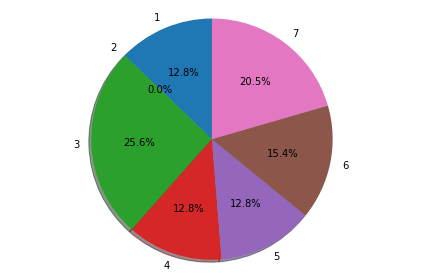

In [59]:
import matplotlib.pyplot as plt
text_input = input("Card text: ").lower()
# results = df[df["text"] == text_input]
mask = df["text"] == text_input
results = []
ser = pd.Series(df["text"])
ser2 = pd.Series(df["type"])
ser3 = pd.Series(df["convertedManaCost"])
card_types = [0,0,0,0,0,0,0]
cmcs = [0,0,0,0,0,0,0]
for i in range(0,len(ser)):
  if text_input in str(ser[i]).lower():
    if "Creature" in ser2[i]:
      card_types[0] += 1
    if "Enchantment" in ser2[i]:
      card_types[1] += 1
    if "Artifact" in ser2[i]:
      card_types[2] += 1
    if "Planeswalker" in ser2[i]:
      card_types[3] += 1
    if "Instant" in ser2[i]:
      card_types[4] += 1
    if "Sorcery" in ser2[i]:
      card_types[5] += 1
    if "Land" in ser2[i]:
      card_types[6] += 1
    for j in range(0,7):
      if ser3[i] == j:
        cmcs[j] += 1
    results.append((df[df['text'] == ser[i]]))
    #print(df[df['text'] == ser[i]]['name'][0] + "  " + str(df[df['text'] == ser[i]]['colors'][0]))
print(cmcs)
# Pie chart - I found this model online
if input("Do you want to (1) see the creature types or (2) the converted mana costs?  ") == "1":
  labels = ['creature', 'enchantment', 'artifact', 'planeswalker', 'instant', 'sorcery', 'land']
  sizes = card_types
else:
  labels = ['1', '2', '3', '4', '5', '6', '7']
  sizes = cmcs
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 4. Clean Your Data

* Fill in missing values
* Add in new columns if you think they'd be helpful

## 5. Vizualize Your Data